In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
data = pd.read_excel("Cleaned up Boston House Price Data.xlsx")


Y = data['PRICE'].values
n = int(len(Y))

X = data.iloc[:, :-1].values
no_of_vars = X.shape[1]

'''
feature_names = data.columns.tolist()
feature_names_without_Y = [col for col in feature_names if col !='PRICE']

X = pd.DataFrame(X, columns=feature_names_without_Y)'''

print(f"No of features: {no_of_vars}")
print(f"Number of samples: {n}")

print(X)

No of features: 13
Number of samples: 510
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [87]:
X_mean = np.mean(X,axis=0)
X_std = np.std(X,axis=0)

X = (X-X_mean)/X_std
print(X)

'''from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X = scalar.fit_transform(X)
feature_names = data.columns.tolist()
feature_names_without_Y = [col for col in feature_names if col !='PRICE']

data = pd.DataFrame(X, columns=feature_names_without_Y)
data['Price'] = Y

print(data)'''

print(X.shape)

[[-0.41877882  0.28233273 -1.28447408 ... -1.45451613  0.44241865
  -1.07427512]
 [-0.41632775 -0.4916746  -0.58893408 ... -0.29833903  0.44241865
  -0.48979152]
 [-0.41633009 -0.4916746  -0.58893408 ... -0.29833903  0.39762219
  -1.20775094]
 ...
 [-0.41242168 -0.4916746   0.1212181  ...  1.18156765  0.44241865
  -0.98154455]
 [-0.40671964 -0.4916746   0.1212181  ...  1.18156765  0.40444622
  -0.86352383]
 [-0.41398061 -0.4916746   0.1212181  ...  1.18156765  0.44241865
  -0.66682261]]
(510, 13)


In [ ]:
iterations = 1000
learning_rate = 0.1


In [89]:
b = 0
m = [0] * no_of_vars

costs = []
    
for i in range(iterations):
    y_pred = b + np.dot(X,m) #does m1x1 + m2x2 + m3x3...

    #print(np.dot(X,m))

    cost = (1/n)*(sum((Y-y_pred)**2))
    costs.append(cost)

    for j in range(no_of_vars):
        derivative = (-2/n) * np.sum((Y-y_pred)*X[:, j])
        m[j] = m[j] - learning_rate * derivative

    db = (-2/n) * sum(Y-y_pred)
    b = b - learning_rate*db
    

print(m)
print(b)
        


[np.float64(-0.570150072113789), np.float64(0.47801619823035574), np.float64(-0.6129927251631548), np.float64(0.5575603281219452), np.float64(-0.47329061188537824), np.float64(1.8079055232437282), np.float64(-0.3663317465732528), np.float64(-0.1479732276038361), np.float64(-0.2996946170727877), np.float64(-0.5743850437832229), np.float64(-1.107574907192098), np.float64(0.5515573429180363), np.float64(-1.6509272449326906)]
8.95660435009507


In [90]:
y_final = np.dot(X,m) + b

print(f"Final coefficients: {m}")
print(f"Costant term: {b}")

Final coefficients: [np.float64(-0.570150072113789), np.float64(0.47801619823035574), np.float64(-0.6129927251631548), np.float64(0.5575603281219452), np.float64(-0.47329061188537824), np.float64(1.8079055232437282), np.float64(-0.3663317465732528), np.float64(-0.1479732276038361), np.float64(-0.2996946170727877), np.float64(-0.5743850437832229), np.float64(-1.107574907192098), np.float64(0.5515573429180363), np.float64(-1.6509272449326906)]
Costant term: 8.95660435009507


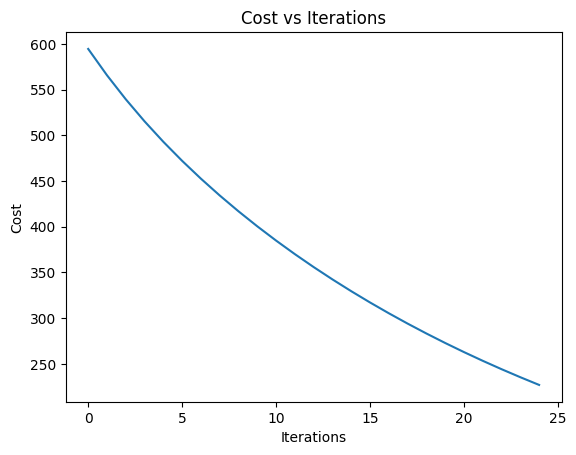

In [91]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

In [92]:
r_squared = 1 - (np.sum((Y - y_final)**2) / np.sum((Y - np.mean(Y))**2))
print(f"R-squared: {r_squared:.4f}")

R-squared: -1.5986
